# Lab 4: Implement Decision tree algorithm for cassification

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### import dataset 

In [2]:
dataset = pd.read_csv('bill_authentication.csv')    

### EDA Steps

In [3]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
dataset.shape

(1372, 5)

In [5]:
dataset.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
dataset.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Preprocessing steps

In [8]:
# step 1 : Separate input and output variable
X= dataset.iloc[:,:-1].values
Y= dataset.iloc[:,-1].values

In [9]:
print(X)
print(Y)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
[0 0 0 ... 1 1 1]


In [10]:
# Step 4 : splitting the data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [11]:
print(X_train.shape)
print(X_test.shape)

(1029, 4)
(343, 4)


In [12]:
# Step 5: Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [13]:
print(X_test)

[[-1.34123414e+00  8.74671962e-04 -2.92947099e-01 -5.39332443e-01]
 [ 3.26039628e-01  4.24971975e-01  1.43889718e-01  7.18511675e-01]
 [-1.50112427e+00 -1.63231673e+00  2.25057518e+00 -6.59738358e-02]
 ...
 [-7.26498948e-01  1.35941991e-01 -8.56626235e-01 -4.41726408e-01]
 [-1.06380094e+00  1.52214995e+00  1.94871291e-01 -2.01988721e+00]
 [-6.85489171e-01  2.34930561e-01 -6.90329694e-01 -1.06944313e+00]]


### Training the decision tree classification model on the training set

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting the test result

In [15]:
ypred = classifier.predict(X_test)

### Compare the predicted and actual output

In [23]:
print(np.concatenate(( ypred.reshape(len(ypred),1), Y_test.reshape(len(Y_test),1)), 1))

[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]

### Making the confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,ypred)
print(cm)

[[188   5]
 [  2 148]]


In [18]:
print("Accuracy: ", (189+145)/343*100)

Accuracy:  97.37609329446065


In [19]:
# Build the classification report

from sklearn.metrics import classification_report
print(classification_report(Y_test,ypred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       193
           1       0.97      0.99      0.98       150

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



### Visualizing the Training Set Result

Visualize Text Representation

In [21]:
from sklearn import tree
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_0 <= 0.11
|   |--- feature_1 <= 0.60
|   |   |--- feature_0 <= -0.29
|   |   |   |--- feature_2 <= 1.31
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  1.31
|   |   |   |   |--- feature_1 <= -1.17
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  -1.17
|   |   |   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.29
|   |   |   |--- feature_2 <= -0.21
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  -0.21
|   |   |   |   |--- feature_3 <= 0.90
|   |   |   |   |   |--- feature_2 <= -0.05
|   |   |   |   |   |   |--- feature_1 <= -0.34
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  -0.34
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  -0.05
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  0.90
|   |   |   |   |   |--- feature_2 <= 0.96
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  0.96
|   |   |   |   |   |   |---

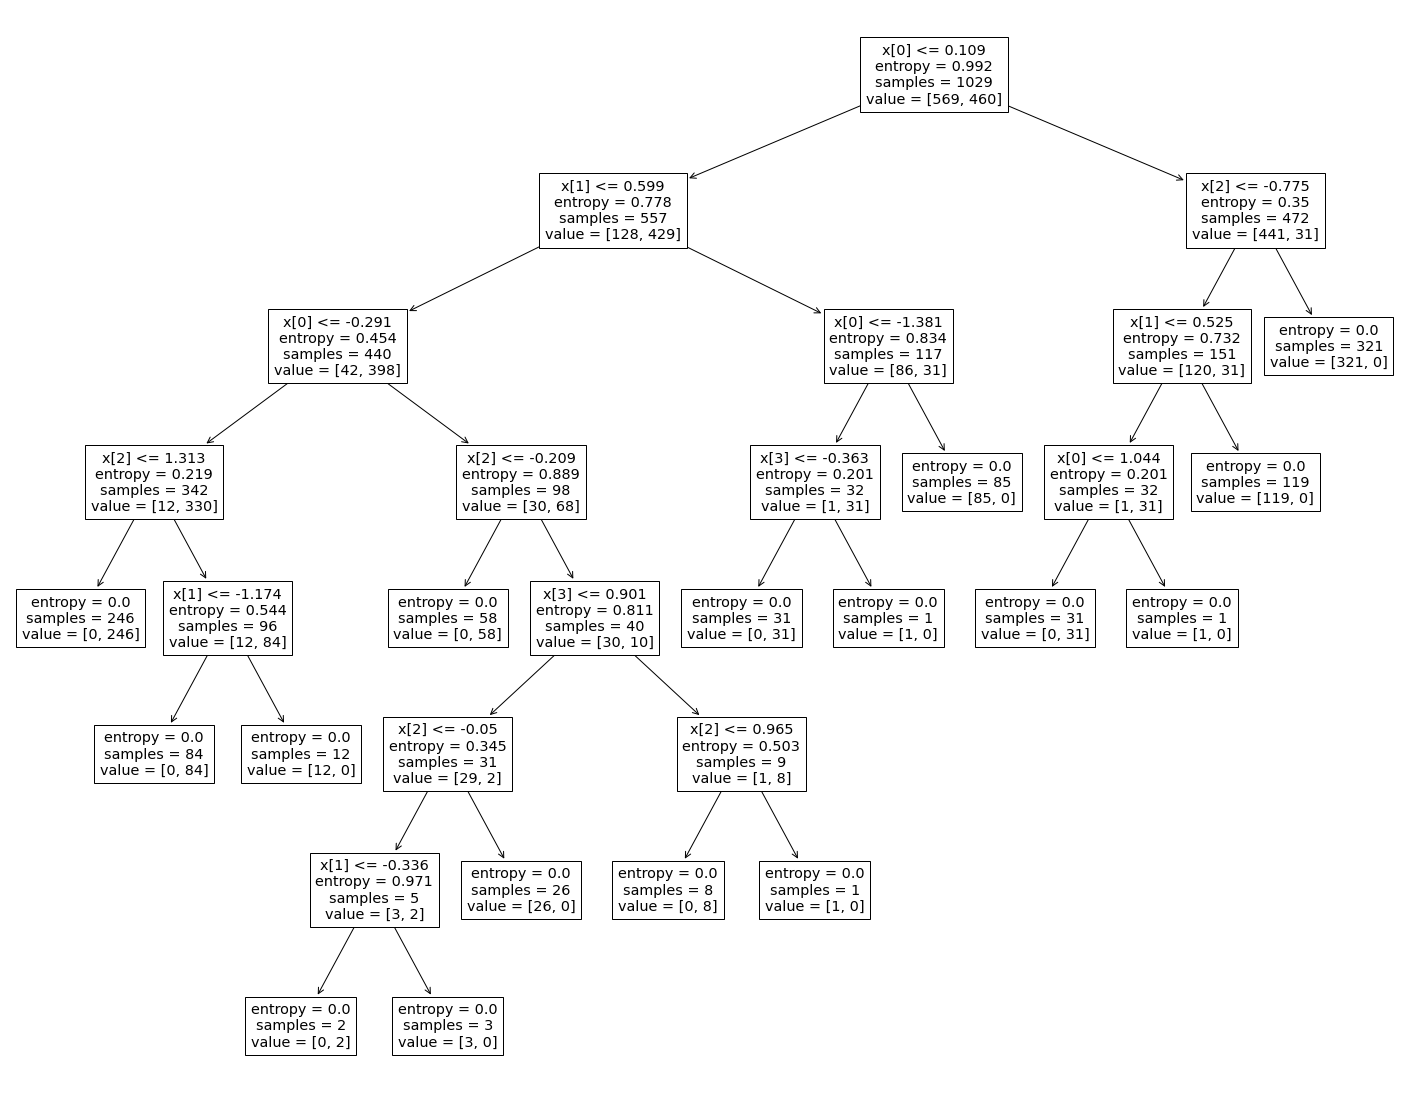

In [22]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier)
plt.show()

**Test your Knowledge**

Q] Crete the model with following settings a. Criterion = log_loss b. Splitter = random c. max_features = sqrt d. random_state = any number of your choice

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'log_loss', splitter='random' , 
                                    max_features='sqrt', random_state = 57)
classifier2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='log_loss', max_features='sqrt',
                       random_state=57, splitter='random')

In [30]:
ypred = classifier2.predict(X_test)

In [31]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(Y_test,ypred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       193
           1       0.97      0.99      0.98       150

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343

